In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.visualization import plot_histogram

## 2-qubit system 








In [9]:
#circuit for the Oracle for |w> = |00> 

def circuitFor00(n):
    
    grover_circuit = QuantumCircuit(n)

    # add Hadamard gate to each qubit to get the initial state |s> 
    for qubit in range(n):
        grover_circuit.h(qubit)
        
        
    # apply Oracle U_f
    for qubit in range(n):
        grover_circuit.x(qubit)

    grover_circuit.cz(0,1)
            
    for qubit in range(n):
        grover_circuit.x(qubit)
    # end of Oracele U_f 
        
        
    # apply reflection U_s     
    for qubit in range(n):
        grover_circuit.h(qubit)
        
    for qubit in range(n):
        grover_circuit.z(qubit)

    grover_circuit.cz(0,1)
    # end of reflection U_s 
    
    
    # add Hadamard gate to get the final state out of superpositioned state function 
    for qubit in range(n):
        grover_circuit.h(qubit)


    return grover_circuit

In [15]:
def excute_circuit(quantum_circuit):
    backend_sim = Aer.get_backend('statevector_simulator')
    job_sim = execute(quantum_circuit, backend_sim)
    statevec = job_sim.result().get_statevector()
    quantum_circuit.measure_all()

    backend = Aer.get_backend('qasm_simulator')
    shots = 1024
    results = execute(quantum_circuit, backend=backend, shots=shots).result()
    answer = results.get_counts()
    
    return answer

## 2-qubit circuit with marked state |00>

The following figure shows the evolution of state function after each gate, 
leading to the final marked state 

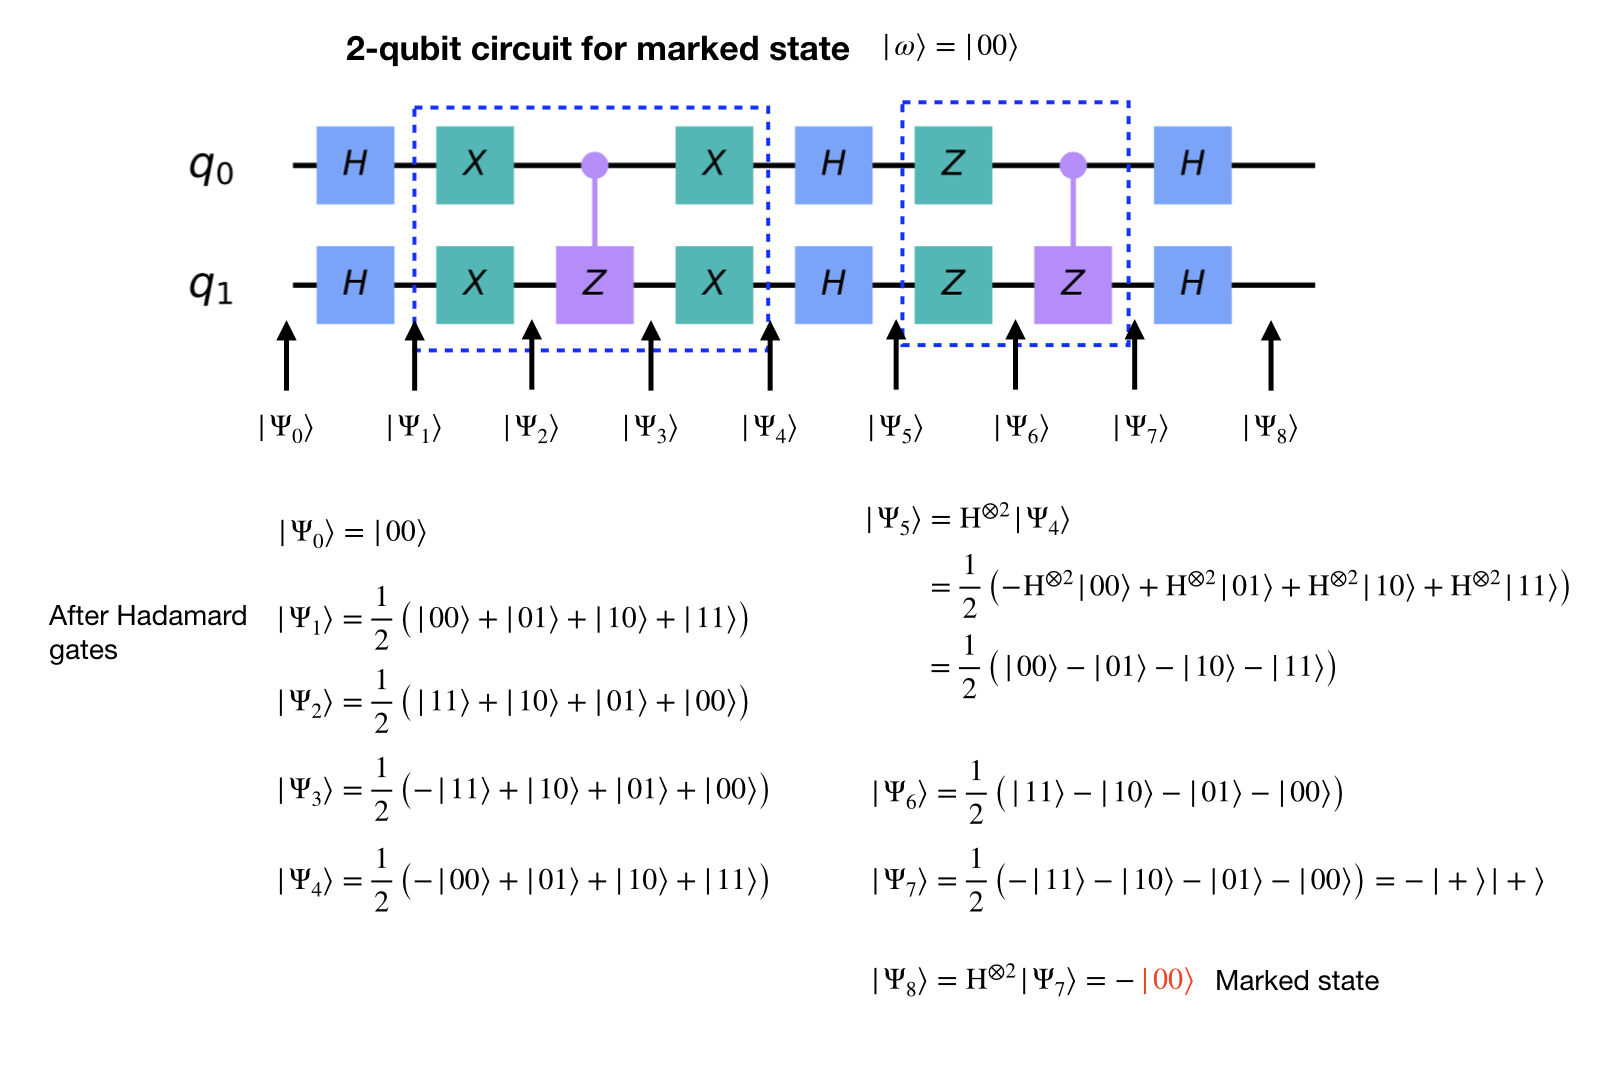

In [16]:
from IPython.display import Image
Image(filename='/Users/gimoonnam/Desktop/QCcircuit/grover_2-qubit_00.png')

The QC simulation result yields the expected marked state shown as below. 

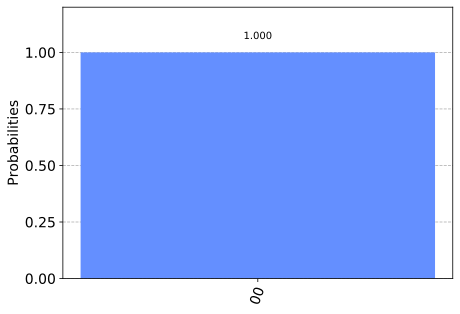

In [17]:
n=2
qc00 = circuitFor00(n)
#display(qc00.draw('mpl'))
answer = excute_circuit(qc00)
plot_histogram(answer)

In [21]:
#circuit for the Oracle for |w> = |11> 

def circuitFor11(n):
    
    grover_circuit = QuantumCircuit(n)

    # add Hadamard gate to each qubit to get the initial state |s> 
    for qubit in range(n):
        grover_circuit.h(qubit)
        
    
    # apply Oracle U_f
    grover_circuit.cz(0,1)
    # end of Oracele U_f 
        
        
    # apply reflection U_s     
    for qubit in range(n):
        grover_circuit.h(qubit)
        
    for qubit in range(n):
        grover_circuit.z(qubit)

    grover_circuit.cz(0,1)
    # end of reflection U_s 
    
    
    # add Hadamard gate to get the final state out of superpositioned state function 
    for qubit in range(n):
        grover_circuit.h(qubit)


    return grover_circuit

## 2-qubit circuit with marked state |11>

The following figure shows the evolution of state function after each gate, 
leading to the final marked state 

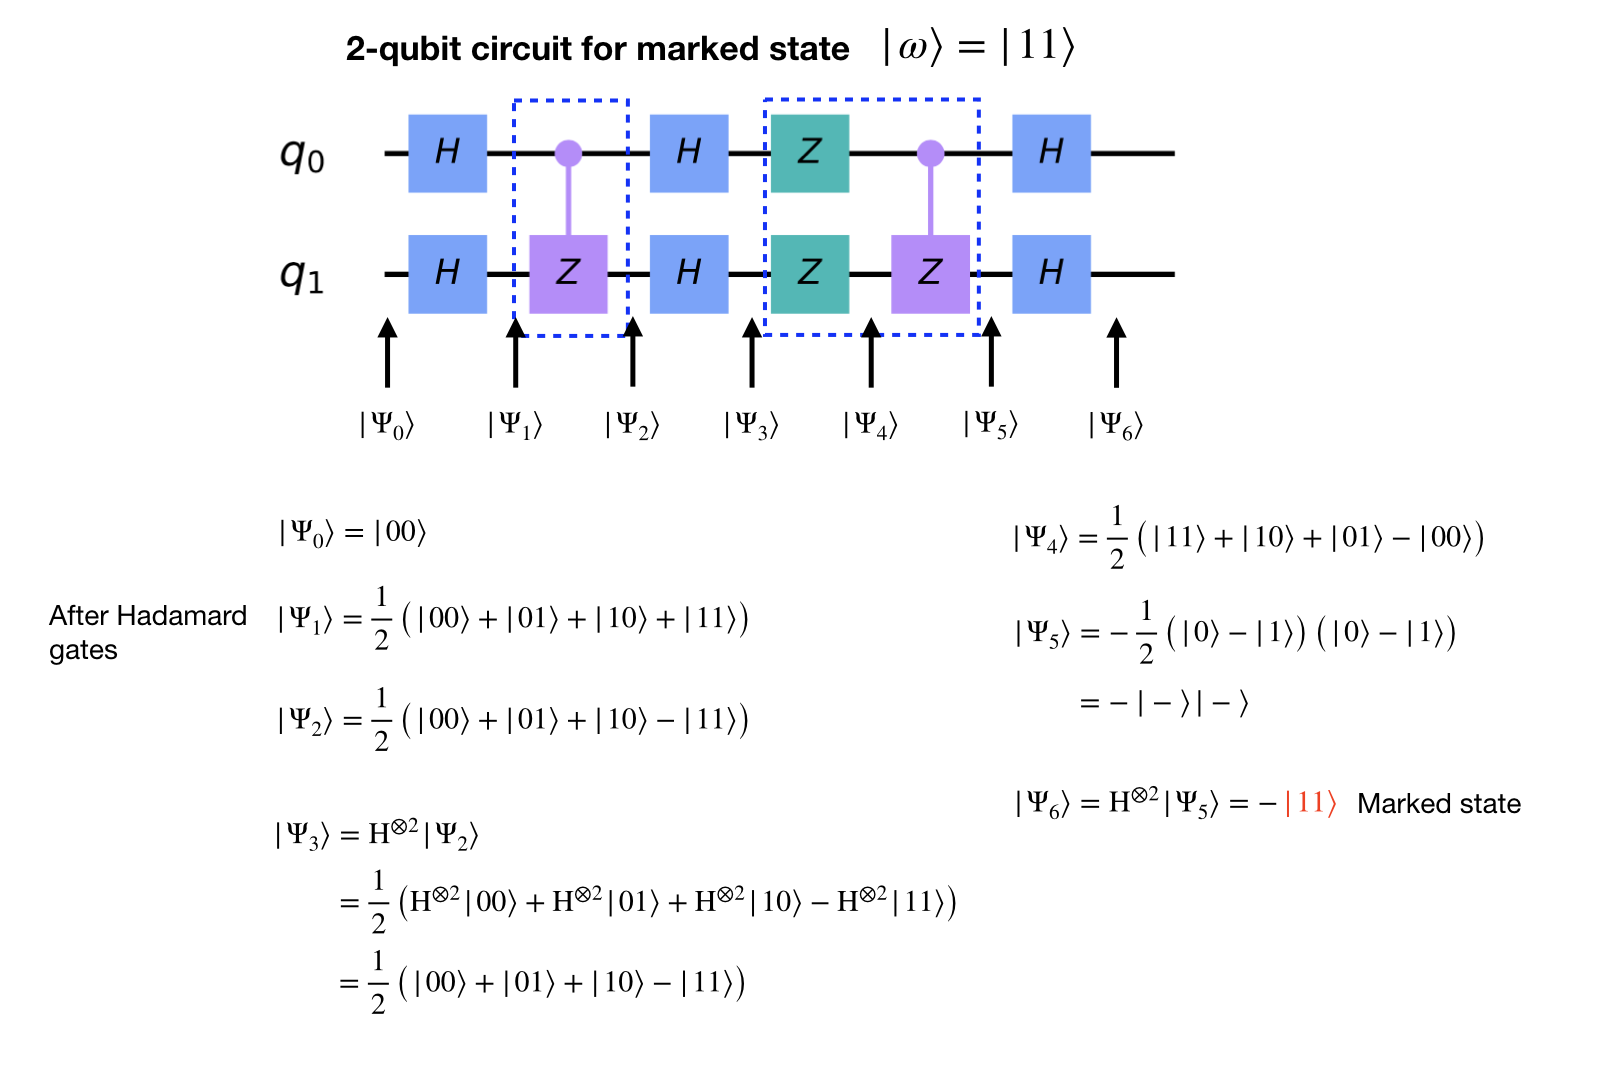

In [25]:
from IPython.display import Image
Image(filename='/Users/gimoonnam/Desktop/QCcircuit/grover_2-qubit_11.png')

The QC simulation result yields the expected marked state shown as below. 

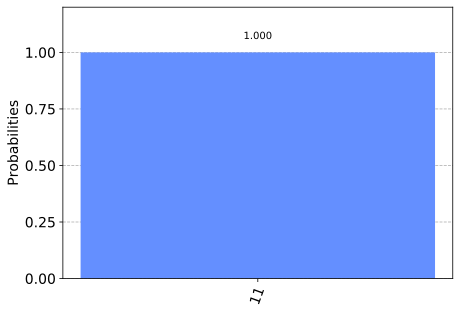

In [23]:
qc11 = circuitFor11(n)
answer = excute_circuit(qc11)
plot_histogram(answer)

least busy backend:  ibmq_rome
Job Status: job has successfully run


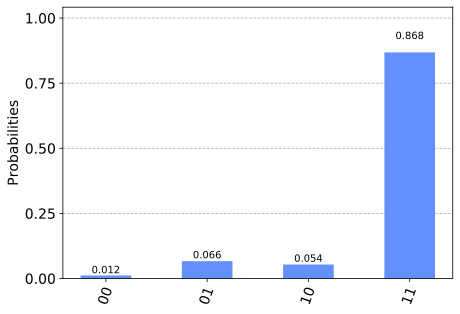

In [24]:
from qiskit.tools.monitor import job_monitor
# Load local account information
IBMQ.load_account()

# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)


shots = 1024
job = execute(qc11, backend=backend, shots=shots, optimization_level=3)
job_monitor(job, interval = 2)


results = job.result()
answer = results.get_counts(qc11)
plot_histogram(answer)